# <A> Sample of Importing data using SQL</A>

In [1]:

from sqlalchemy import create_engine

import pandas as pd

engine = create_engine('sqlite:///Northwind.sqlite')

con = engine.connect()

con.execute("CREATE TABLE Orders(ID VARCHAR2(1))")

con.execute("insert into Orders(ID) values ('1')")

rs = con.execute("SELECT * FROM Orders")

df = pd.DataFrame(rs.fetchall())

con.close()

df

,0
0,1


# <A> Sample of DataFrame Merge </A>

In [7]:
df1 = pd.DataFrame({'ID':[1,2,3,4,5],'Name':['A','B','C','D','E'],'DeptId':[1,2,3,3,2]})
df2 = pd.DataFrame({'ID':[1,2,3],'DeptName':['Sales','HR','Tech']})
df = df1.merge(df2,how ='inner',left_on ='ID',right_on ='ID')
df

,ID,Name,DeptId,DeptName
0,1,A,1,Sales
1,2,B,2,HR
2,3,C,3,Tech


# <A> Credit card fraud detection</A>

## <a>About the dataset</a>  
The datasets contain transactions that have 492 frauds out of 284,807 transactions. So the dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. When we try to build the prediction model with this kind of unbalanced dataset, then the model will be more inclined towards to detect new unseen transaction as genuine as our dataset contains about 99% genuine data.

As our dataset is highly imbalanced, so we shouldn't use accuracy score as a metric because it will be usually high and misleading, instead use we should focus on f1-score, precision/recall score or confusion matrix.

In [1]:
#importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
import io
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.ensemble  import RandomForestClassifier

from imblearn.over_sampling import ADASYN,SMOTE

## <a>Exploratory Data Analysis</a>

In [2]:
#importing the dataset
credit_card = pd.read_csv("creditcard.csv")

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#path = '/content/drive/My Drive/DS/creditcard.csv'
#path = 'C:/Users/Pravesh/DS/DS/DS_Data/creditcard.csv'
#credit_card = pd.read_csv(path)
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
credit_card.shape

(284807, 31)

## <a> Value counts for class</a> 

In [10]:
credit_card['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### <a>Percentage distribution of class </a> 

In [11]:
credit_card['Class'].value_counts(normalize = 'True')*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [12]:
classes=credit_card['Class'].value_counts()
normal_share=classes[0]/credit_card['Class'].count()*100
fraud_share=classes[1]/credit_card['Class'].count()*100
print('Normal Share :',normal_share)
print('Fraud Share :',fraud_share)

Normal Share : 99.82725143693798
Fraud Share : 0.1727485630620034


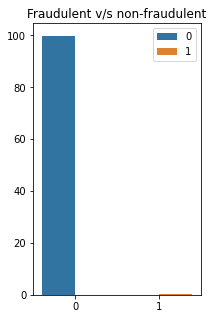

In [13]:
fig,ax = plt.subplots(figsize=(3,5))
plt.title('Fraudulent v/s non-fraudulent')
sns.barplot(x = credit_card['Class'].unique(),y=[normal_share,fraud_share],hue=credit_card['Class'].unique())

There are only 492 records(0.17%) identified as fraud in given data set. It implies that data set is highliy imbalanced.
 

## <a>Finding Null Values</a>

In [14]:
credit_card.isnull().sum().max()

0

In [15]:
credit_card[['Amount','Time']].describe()

,Amount,Time
count,284807.000000,284807.000000
mean,88.349619,94813.859575
std,250.120109,47488.145955
min,0.000000,0.000000
25%,5.600000,54201.500000
50%,22.000000,84692.000000
75%,77.165000,139320.500000
max,25691.160000,172792.000000


## <a> Distribution of class with amount</a>

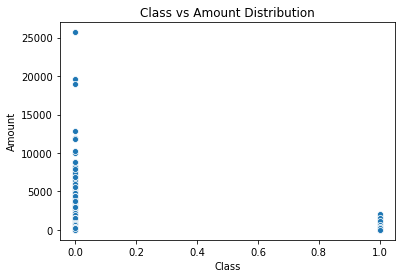

In [16]:
sns.scatterplot(x=credit_card['Class'],y=credit_card['Amount'])
plt.title('Class vs Amount Distribution')
plt.show()

## <a> Distribution of class with time</a>

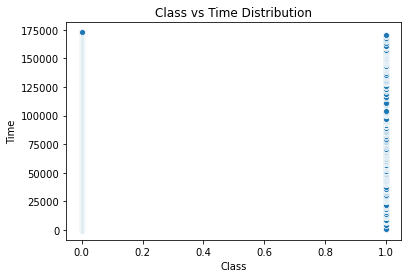

In [17]:
sns.scatterplot(x=credit_card['Class'],y=credit_card['Time'])
plt.title('Class vs Time Distribution')
plt.show()

In [18]:
#no of fradulent transactions vs amount
credit_card[(credit_card['Class']==1)]['Amount'].value_counts().head(10)

1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
0.01       5
2.00       4
3.79       4
1.10       3
2.28       3
Name: Amount, dtype: int64

In [19]:
#maximum amount of fraud transaction
credit_card[(credit_card['Class']==1)]['Amount'].max()

2125.87

In [20]:
#minimum amount of genuine transaction
credit_card[(credit_card['Class']==1)]['Amount'].min()

0.0

## <a>Time distribution with Fraud & Genuine Transaction</a> 

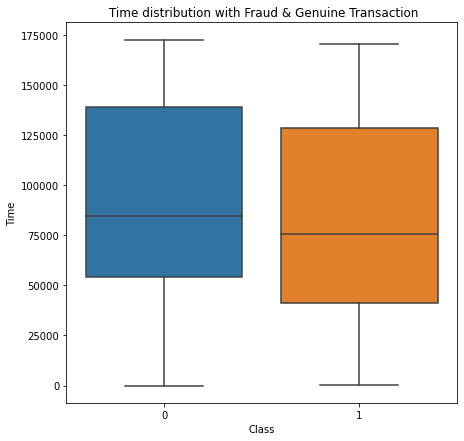

In [21]:
plt.figure(figsize = (7,7))
sns.boxplot(data= credit_card,x='Class',y='Time')
plt.title(' Time distribution with Fraud & Genuine Transaction')
plt.show()

## <a>Amount distribution with Fraud & Genuine Transaction</a>

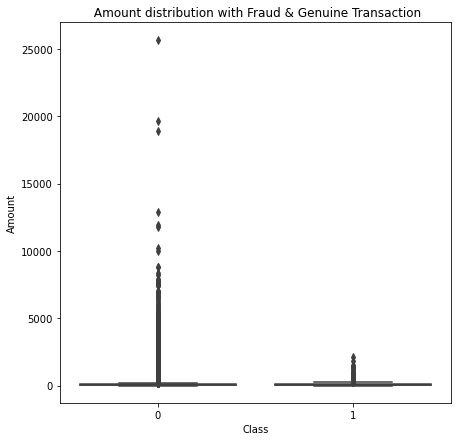

In [22]:
plt.figure(figsize = (7,7))
sns.boxplot(data= credit_card,x='Class',y='Amount')
plt.title(' Amount distribution with Fraud & Genuine Transaction')
plt.show()

## <a> Dropping uneccessary columns</a>

##### Column time denote the time lapse between transactions.Its not required so we can drop it

In [23]:
credit_card.drop('Time',axis=1,inplace= True)

In [24]:
credit_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## <a>Splitting the data into train & test data<a>

In [25]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [26]:
y = credit_card.pop('Class')

In [27]:
X = credit_card

In [28]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,stratify = y ,train_size = 0.7,test_size = 0.3,random_state = 100 )

In [29]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
222925,2.053474,-0.149880,-1.092234,0.420978,-0.225796,-1.159629,0.082871,-0.236532,0.733270,0.102520,...,-0.313465,-0.298362,-0.779702,0.362701,-0.048183,-0.356438,0.205392,-0.075806,-0.063325,1.29
163811,0.149477,1.112008,-0.391539,-0.557452,1.014727,-0.801985,1.042734,-0.167625,-0.200830,-0.863839,...,0.084311,-0.331768,-0.755443,0.079155,0.587098,-0.383245,0.110292,0.229167,0.086294,2.69
196038,2.145379,0.215237,-2.221643,-0.067032,0.815822,-1.358596,0.843943,-0.594243,0.009745,-0.021497,...,-0.133286,0.153606,0.611995,-0.027494,0.824538,0.505014,0.203037,-0.083225,-0.069468,4.55
25173,-0.354219,0.100332,1.721509,-0.884417,-0.371977,-0.062313,-0.144740,0.163123,-1.843755,0.520706,...,0.295444,0.136969,0.217167,-0.014350,0.016538,-0.326120,-0.285113,0.118226,0.103791,19.95
253792,-0.439888,1.871311,-1.106687,1.064853,1.239594,-0.633668,1.100319,0.221096,-0.917002,-0.844362,...,0.024939,0.059066,0.366613,-0.250861,0.494710,0.091257,-0.398552,0.330173,0.219909,6.30


## <a>Scaling Features</a> 

 Feature V1 to V28 are PCA but amount column has the value of the transaction. So amount column need to be scalled.

In [30]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [31]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
222925,1.047857,-0.089981,-0.722516,0.295762,-0.167006,-0.875547,0.069964,-0.193948,0.669928,0.097071,...,-0.412092,-0.399849,-1.071828,0.581758,-0.078287,-0.684822,0.427091,-0.191377,-0.193344,-0.358200
163811,0.075213,0.673694,-0.259348,-0.394675,0.741460,-0.605717,0.857552,-0.136950,-0.181582,-0.795726,...,0.111049,-0.444623,-1.038458,0.128270,0.968892,-0.736228,0.229585,0.577329,0.261221,-0.352426
196038,1.094806,0.130982,-1.469071,-0.048607,0.595797,-1.025660,0.694439,-0.489836,0.010375,-0.017506,...,-0.175127,0.205925,0.842593,-0.042298,1.360281,0.967107,0.422202,-0.210078,-0.212007,-0.344755
25173,-0.182096,0.061443,1.137406,-0.625400,-0.274057,-0.047662,-0.116796,0.136635,-1.679244,0.483423,...,0.388724,0.183627,0.299468,-0.021276,0.028398,-0.626684,-0.591605,0.297694,0.314381,-0.281240
253792,-0.225859,1.133213,-0.732071,0.750117,0.906137,-0.478729,0.904801,0.184588,-0.834431,-0.777732,...,0.032965,0.079213,0.505045,-0.399538,0.816603,0.173683,-0.827199,0.831924,0.667164,-0.337537


## Skewness Check

In [32]:
cols = list(X_train.columns)
print((cols))

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [33]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

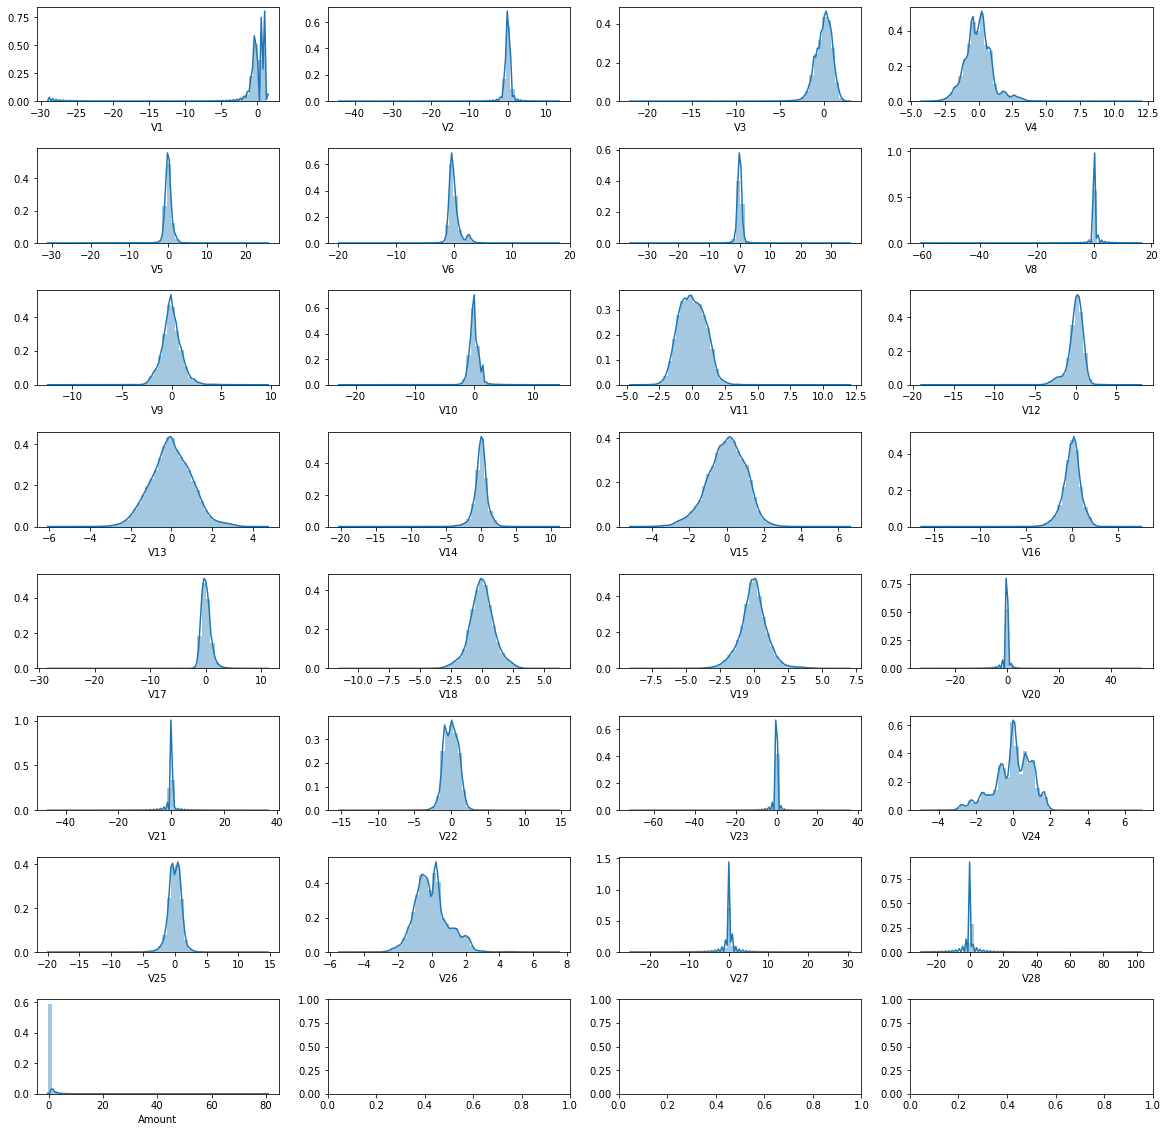

In [34]:
fig,axes=plt.subplots(nrows=8,ncols=4)
nrow = 0
ncol = 0
for col in cols:
  sns.distplot(X_train[col],ax=axes[nrow,ncol])
  
  #axes[nrow,ncol].set_title(col)
  if ncol == 3 and nrow < 7:
    nrow = nrow+1
    ncol = 0
  else:
    ncol = ncol+1
plt.subplots_adjust(hspace=0.5)




 As we can see from above plots, most of features are gausian.Some are perfect and some have little bit of skewness.Like V24 and V26 have some skewness. So let's do the power transfomration to mitigate this skewness in next step.

**Mitigate Skewness**

In [35]:
pt =preprocessing.PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

In [36]:
pt.fit_transform(X_train)

array([[ 1.45226563, -0.17426266, -0.82969258, ..., -0.21769929,
        -0.18301398, -1.03242445],
       [-0.16038622,  0.70710387, -0.41348864, ...,  0.57727491,
         0.2815067 , -0.98250096],
       [ 1.54889907,  0.06543939, -1.40698421, ..., -0.23637459,
        -0.20242215, -0.91732703],
       ...,
       [ 0.4525448 , -0.65915434,  0.44249951, ...,  0.09285606,
         0.20640756,  1.53670874],
       [ 0.22630489, -0.99835066,  0.06020314, ..., -0.19131371,
         0.24916567,  1.90280732],
       [-0.45357871,  0.76125271,  0.25205664, ..., -0.1200602 ,
        -1.54280646, -1.01450846]])

In [37]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
222925,1.452266,-0.174263,-0.829693,0.368215,-0.167617,-0.925794,0.057241,-0.300148,0.699297,0.137061,...,-0.414391,-0.395079,-1.068219,0.586806,-0.181819,-0.707399,0.511744,-0.217699,-0.183014,-1.032424
163811,-0.160386,0.707104,-0.413489,-0.340912,0.741320,-0.590500,0.861507,-0.236130,-0.133893,-0.804501,...,0.108184,-0.442055,-1.036206,0.115953,1.003716,-0.755735,0.326006,0.577275,0.281507,-0.982501
196038,1.548899,0.065439,-1.406984,0.026864,0.595495,-1.118940,0.693308,-0.617806,0.062124,0.021240,...,-0.178064,0.226240,0.839925,-0.057892,1.504972,0.976979,0.507237,-0.236375,-0.202422,-0.917327
25173,-0.455148,-0.011498,1.327495,-0.598199,-0.274626,0.047047,-0.129948,0.086947,-1.798835,0.516857,...,0.386839,0.203876,0.281557,-0.036577,-0.073718,-0.652511,-0.548739,0.282249,0.334854,-0.425881
253792,-0.500348,1.298391,-0.837715,0.788778,0.906210,-0.438387,0.910365,0.146378,-0.834376,-0.784769,...,0.029980,0.098664,0.491533,-0.415847,0.816193,0.133816,-0.828262,0.850554,0.684747,-0.857193


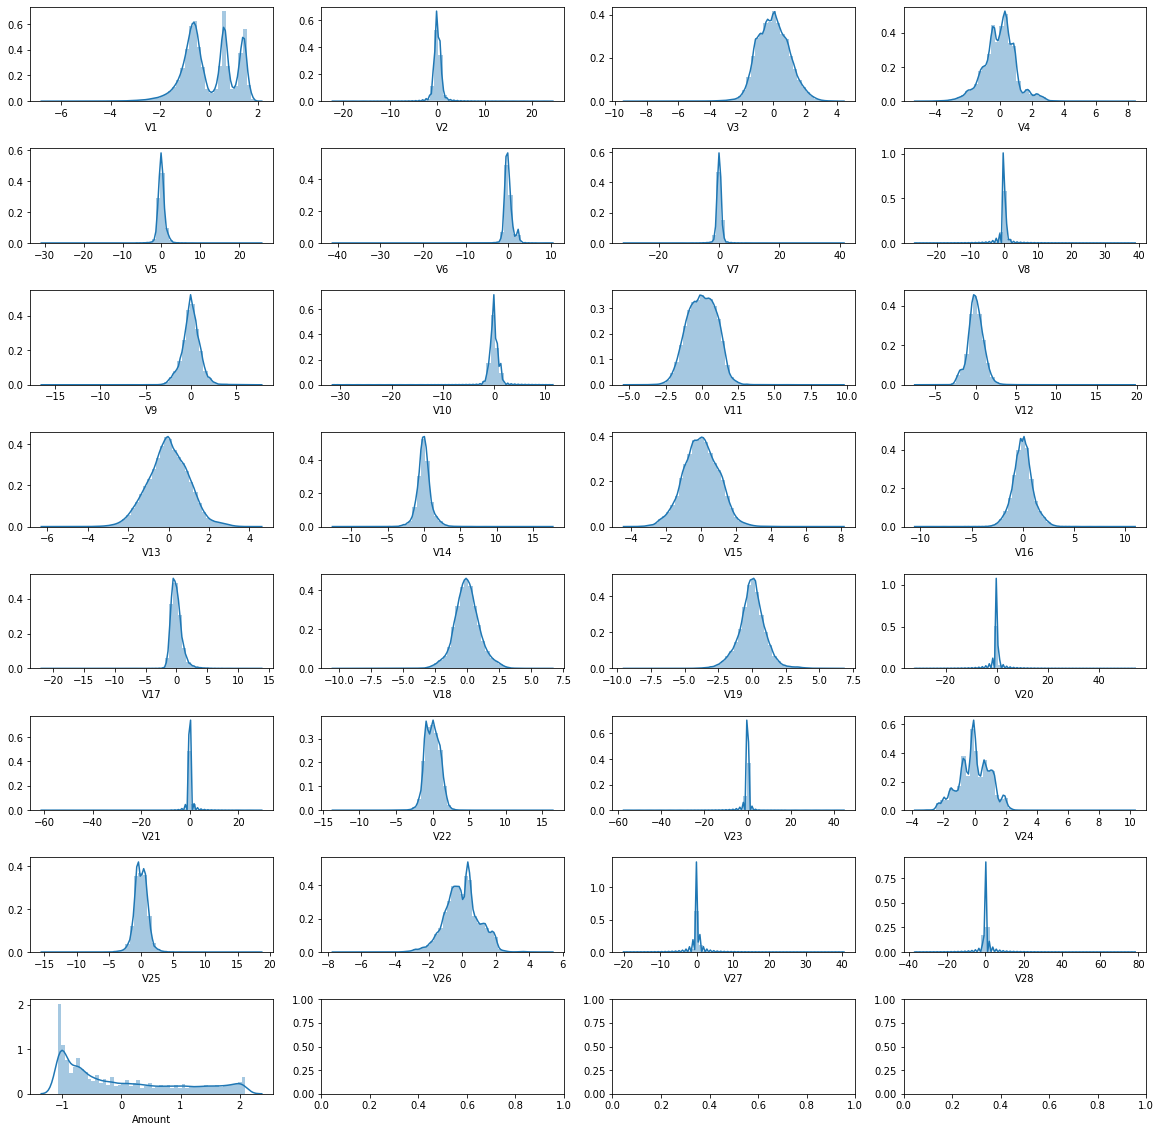

In [38]:
fig,axes=plt.subplots(nrows=8,ncols=4)
nrow = 0
ncol = 0
for col in cols:
  sns.distplot(X_train[col],ax=axes[nrow,ncol])
  
  #axes[nrow,ncol].set_title(col)
  if ncol == 3 and nrow < 7:
    nrow = nrow+1
    ncol = 0
  else:
    ncol = ncol+1
plt.subplots_adjust(hspace=0.5)

# <a> Model Building </a>

## <a> 1. Logistic Regression </a>

In [39]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train,y_train) 

LogisticRegression()

In [40]:
y_pred = lm.predict(X_train)

In [41]:
# Accuracy
lm.score(X_train,y_train)

0.9992927509480147

In [42]:
lm.coef_

array([[-0.20543858, -0.22984787, -0.3703167 ,  0.94774582, -0.05678819,
         0.09884367, -0.22931147, -0.18749891, -0.16821891, -0.08699632,
         0.1090433 , -0.62200911, -0.24400881, -0.77354024, -0.20413364,
        -0.39623781,  0.06649231,  0.08062012, -0.15752544, -0.04979878,
         0.20145314,  0.27776673, -0.08683981,  0.12793978,  0.03397416,
         0.06763165, -0.1486567 , -0.09312661, -0.05462584]])

As we can see that accuracy of our model is 99.9% on train set.Let's see other metrices also :

In [43]:
confusion = metrics.confusion_matrix(y_train,y_pred)
print(confusion)

[[198991     29]
 [   112    232]]


In [44]:
# Predicted     not_convert    convert
# Actual
# not_convert        198993        27
# convert            114           230 

In [45]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Sensivity of LR :

In [46]:
TP / float(TP+FN)

0.6744186046511628

specificity :

In [47]:
TN / float(TN+FP)

0.9998542860014069

***False postive rate*** - predicting fraud when transaction is not fraud

In [48]:
FP/ float(TN+FP)

0.00014571399859310621

***False negative rate*** - predicting fraud when transaction is not fraud

In [49]:
FP/ float(TN+FP)

0.00014571399859310621

Positive predictive value :

In [50]:
TP / float(TP+FP)

0.8888888888888888

Negative predictive value :

In [51]:
TN / float(TN+ FN)

0.999437477084725

***Observations:***

1. Accuracy is 99.9% which is quite high and there are cahnces of model overfitting but that would be confirmed after the model evaluation on the test data set only.
2. Sensivity is ~67% .It means model is good in predicting the positives(i.e. Model is good in predicting the frauds).
3. Specificity is 99.9%. It shows that model prediction for non-fraud transaction is extremely good.
4. False positive and false negative rates are quite low.

**ROC Curve**

In [39]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

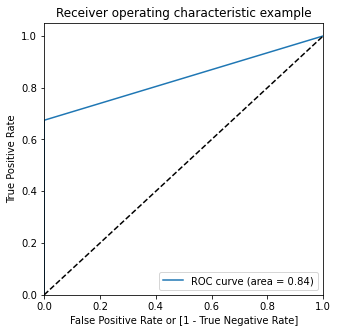

In [53]:
draw_roc(y_train, y_pred)

ROC curve is quite sharp.AUC is 0.83 which is good.

**Hyper Parameters tuning using Randomized Search**

In [54]:
lm2 = LogisticRegression()

In [55]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution

C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [56]:
# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(lm2, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [57]:
# Fit randomized search
best_model = clf.fit(X_train, y_train)

In [58]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.15621913293152945


Let's create best model with these parameters :

In [59]:
lm3 = LogisticRegression(penalty = 'l2',C=0.94)

In [60]:
best_model = lm3.fit(X_train,y_train)

In [61]:
# Predict target vector
y_pred2 = best_model.predict(X_train)

In [62]:
#Accuracy
best_model.score(X_train,y_train)

0.9992927509480147

In [63]:
confusion = metrics.confusion_matrix(y_train,y_pred2)
print(confusion)

[[198991     29]
 [   112    232]]


In [64]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.6744186046511628
specificity:  0.9998542860014069


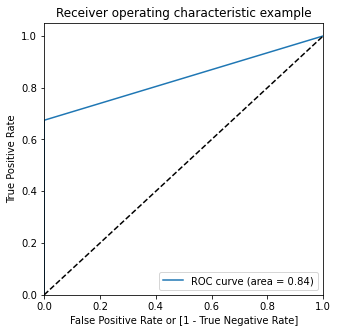

In [65]:
# ROC Curve
draw_roc(y_train, y_pred2)

As we can see that ROC Curve area is 0.83 which is similar to previous model because there was minute improvement in accuracy.

## <a> 2. KNN </a>

Let's build next model with K-Nearest Neighbours algorithm

In [57]:
k_range = range(1,6)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred_knn = knn.predict(X_train)
  scores[k] = metrics.accuracy_score(y_train,y_pred_knn)
  scores_list.append(metrics.accuracy_score(y_train,y_pred_knn))

Text(0, 0.5, 'Accuracy')

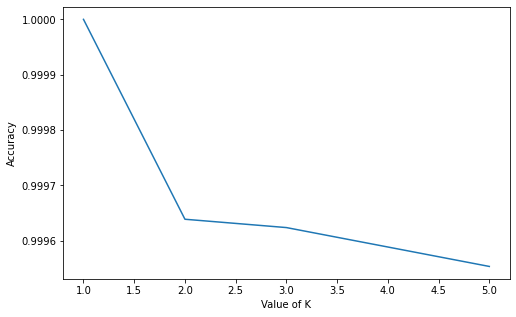

In [62]:
# Plot the k versus accuracy score
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.plot(k_range,scores_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

As the accuracy is dropping with increase in k value, let's now create model for k values 6-10 range this time.

In [53]:
k_range = range(6,9)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred_knn = knn.predict(X_train)
  scores[k] = metrics.accuracy_score(y_train,y_pred_knn)
  scores_list.append(metrics.accuracy_score(y_train,y_pred_knn))

Text(0, 0.5, 'Accuracy')

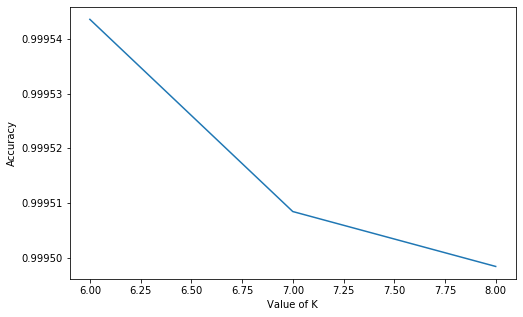

In [54]:
# Plot the k versus accuracy score
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.plot(k_range,scores_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

In [55]:
k_range = range(10,15)
scores3 = {}
scores_list3 = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred_knn = knn.predict(X_train)
  scores[k] = metrics.accuracy_score(y_train,y_pred_knn)
  scores_list.append(metrics.accuracy_score(y_train,y_pred_knn))

Text(0, 0.5, 'Accuracy')

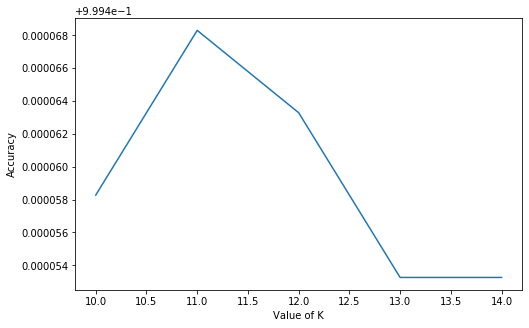

In [72]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

By combining the above 3 graphs we can see that optimized value for K is 2 as accuracy is dropping after that. After 13 its stablized but the value ofthe k would be high and model is overfitting.

In [ ]:
# Useing optimized value of m to train the best model
k=2
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_train)

In [61]:
score = metrics.accuracy_score(y_train,y_pred_knn)
#scores_list.append(metrics.accuracy_score(y_train,y_pred_knn))

In [62]:
score

0.9996388515479224

## <a> 3. SVM </a>

In [56]:
# model
svm1 = svm.SVC(kernel='rbf')

# fit
svm1.fit(X_train, y_train)

# predict
y_pred_svm1 = svm1.predict(X_train)

In [57]:
y_pred_svm1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_svm1), "\n")

# cm
#print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9996438674986456 



In [76]:
cfm_svm1 = metrics.confusion_matrix(y_true=y_train, y_pred=y_pred_svm1)

In [77]:
TP = cfm_svm1[1,1] # true positive 
TN = cfm_svm1[0,0] # true negatives
FP = cfm_svm1[0,1] # false positives
FN = cfm_svm1[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.8228571428571428
specificity:  0.9999547770508608


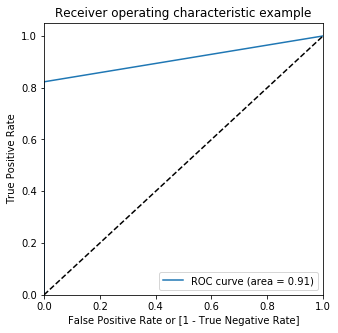

In [105]:
# ROC Curve
draw_roc(y_train, y_pred_svm1)

#### Hyperparameter tunning for SVM :

We are using RandomizedSearch CV for hyperparameter tunning :

In [64]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = svm.SVC(kernel="rbf")
model_rcv = RandomizedSearchCV(model, hyper_params, scoring= 'accuracy', cv=folds, verbose=1,return_train_score=True)

# fit the model
model_rcv.fit(X_train, y_train)        

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 33.2min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
                   error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{'C': [1, 10, 100, 1000],
                                         'gamma': [0.01, 0.001, 0.0001]}],
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='accuracy', verbose=1)

In [69]:
y_pred_svm2 = model_rcv.predict(X_train)

In [70]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_svm2))

accuracy: 0.9997090748580486


As we can see that accuracy has increased slightly by 0.0001

Confusion Matrix :

In [71]:
cfm_svm2 = metrics.confusion_matrix(y_true=y_train, y_pred=y_pred_svm2)

In [72]:
cfm_svm2

array([[199011,      3],
       [    55,    295]], dtype=int64)

In [75]:
TP = cfm_svm2[1,1] # true positive 
TN = cfm_svm2[0,0] # true negatives
FP = cfm_svm2[0,1] # false positives
FN = cfm_svm2[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.8428571428571429
specificity:  0.9999849256836203


1. Sensivity also has increased by 0.01%.
2. There is slight improvemetn in the Specificity also

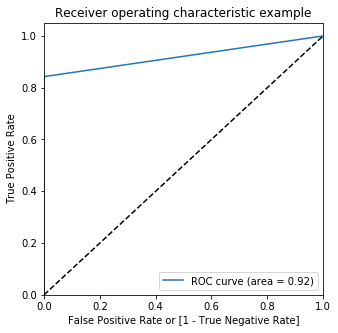

In [89]:
# ROC Curve
draw_roc(y_train, y_pred_svm2)

Let's find out the best SVM model :

In [95]:
# printing the optimal accuracy score and hyperparameters
best_score_svm = model_rcv.best_score_
best_hyperparams_svm = model_rcv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score_svm, best_hyperparams_svm))

The best test score is 0.9995134528301112 corresponding to hyperparameters {'gamma': 0.01, 'C': 10}


Build the final SVM model using above hyper parameters

In [100]:

# model
model_svm3 = svm.SVC(C=10, gamma=0.01, kernel="rbf")

model_svm3.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [101]:
y_pred_svm3 = model_svm3.predict(X_train)

In [102]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_svm3))

accuracy: 0.9997090748580486


In [103]:
cfm_svm3 = metrics.confusion_matrix(y_true=y_train, y_pred=y_pred_svm3)
TP = cfm_svm3[1,1] # true positive 
TN = cfm_svm3[0,0] # true negatives
FP = cfm_svm3[0,1] # false positives
FN = cfm_svm3[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.8428571428571429
specificity:  0.9999849256836203


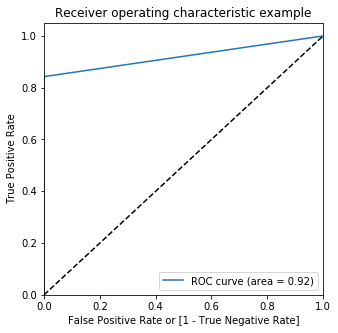

In [104]:
# ROC Curve
draw_roc(y_train, y_pred_svm3)

- As we can see from above that Accuracy,Sensivity have increased slightly after hyperparameter tuning as compared to the SVM first model.
- ROC curver area also has increased by 0.1

## <a> 4. Decision Tree </a>

Now let's build Decision Tree model on our data set and see the results :

In [215]:
decision_tree1 = tree.DecisionTreeClassifier(random_state = 42 )
decision_tree1 = decision_tree1.fit(X_train, y_train)

In [216]:
y_pred_dt1 = decision_tree1.predict(X_train)

In [55]:
print('Accuracy : ',metrics.accuracy_score(y_train,y_pred_dt1))

Accuracy :  1.0


In [56]:
conf_dt1 = metrics.confusion_matrix(y_train,y_pred_dt1)
TP = conf_dt1[1,1] # true positive 
TN = conf_dt1[0,0] # true negatives
FP = conf_dt1[0,1] # false positives
FN = conf_dt1[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  1.0
specificity:  1.0


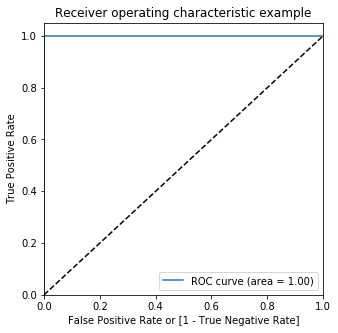

In [57]:
# ROC
draw_roc(y_train,y_pred_dt1)

Decision tree is giving us the 100% accuracy and ROC curve Area is also 1 on train data set.

#### Hyperparameter tunning for Decision Tree:

Let's tune the the hyper parameters using Randomized Search CV and find the best performing Decsion tree model :

In [62]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': list(range(2, 10)),'min_samples_leaf'        
          : list(range(1, 10)),'max_depth': [10, 20, 30, 40,50,60,70,80,90,100],'criterion' : ['gini', 'entropy']}
dt_rscv = RandomizedSearchCV(tree.DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)
dt_rscv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 11.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [63]:
y_pred_dt2 = dt_rscv.predict(X_train)

In [136]:
print('Accuracy :',metrics.accuracy_score(y_train,y_pred_dt2))

Accuracy : 0.9995585963363496


In [65]:
dt_rscv.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 98,
 'max_depth': 80,
 'criterion': 'gini'}

Training model using above best parameters :

In [69]:
decision_tree3 = tree.DecisionTreeClassifier(criterion= 'gini',max_depth = 80,min_samples_split = 4,min_samples_leaf = 4,max_leaf_nodes =98, random_state = 42 )
decision_tree3 = decision_tree3.fit(X_train, y_train)

In [70]:
y_pred_dt3 = decision_tree3.predict(X_train)

In [71]:
print('Accuracy :',metrics.accuracy_score(y_train,y_pred_dt3))

Accuracy : 0.9996538994000923


In [72]:
conf_dt2 = metrics.confusion_matrix(y_train,y_pred_dt3)
TP = conf_dt2[1,1] # true positive 
TN = conf_dt2[0,0] # true negatives
FP = conf_dt2[0,1] # false positives
FN = conf_dt2[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.8313953488372093
specificity:  0.9999447291729474


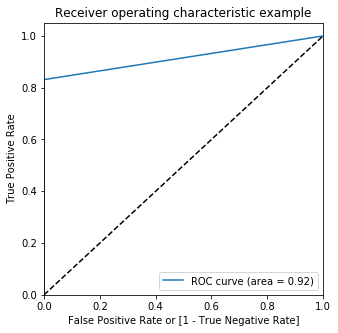

In [73]:
# ROC
draw_roc(y_train,y_pred_dt3)

## <a> 5. Random Forest </a>

In [278]:
rfc1 = RandomForestClassifier()
rfc1= rfc1.fit(X_train, y_train)

In [75]:
y_pred_rfc1 = rfc1.predict(X_train)

In [76]:
print('Accuracy :',metrics.accuracy_score(y_train,y_pred_rfc1))

Accuracy : 0.9999949840492767


In [77]:
conf_rfc1 = metrics.confusion_matrix(y_train,y_pred_rfc1)
TP = conf_rfc1[1,1] # true positive 
TN = conf_rfc1[0,0] # true negatives
FP = conf_rfc1[0,1] # false positives
FN = conf_rfc1[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.997093023255814
specificity:  1.0


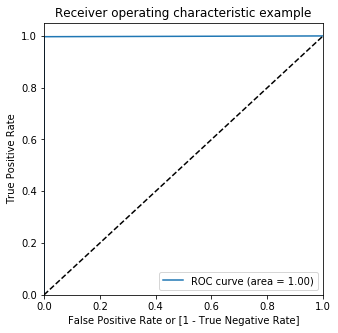

In [78]:
# ROC
draw_roc(y_train,y_pred_rfc1)

#### Hyper paramter tunning for Random Forest

In [53]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [54]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rfc2 = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rscv_rf = RandomizedSearchCV(estimator = rfc2, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rscv_rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 453.5min finished


# <a>Model Building on Balanced Data Set</a> 

In [89]:
# Applying differnt techniques to convert imbalanced dataset into balanced data and building models on these balanced data

In [40]:
# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

## <a >Logistic Regression with Random Oversampling technique</a>

In [41]:
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics


In [42]:
#applying random over sampling technique
ros = RandomOverSampler(random_state=100)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [93]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_ros, y_ros)

y_pred = logreg.predict(X_ros)

In [94]:
logreg.score(X_ros,y_ros)

0.952768565973269

So our accuracy comes out to be 95.27% which is good .

In [95]:
logreg.coef_

array([[ 0.24529446, -0.27756911, -0.18683854,  1.80260218,  0.15222831,
        -0.05991445, -0.1319206 , -0.79529178, -0.32360154, -1.27116981,
         0.75606895, -1.2184307 , -0.07437528, -1.36089407, -0.15060158,
        -0.68357041, -0.73351653, -0.20995343,  0.02573947,  0.0172812 ,
         0.18003541,  0.3491682 , -0.24525683,  0.14893905, -0.17126678,
        -0.04668211,  0.05540656,  0.11610364,  0.03361877]])

In [96]:
confusion = metrics.confusion_matrix(y_ros,y_pred)
print(confusion)

[[194031   4989]
 [ 13811 185209]]


In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
print(" Sensitivity : ", TP / float(TP+FN))
print(" Specificity : ", TN / float(FP+TN))
print(" False Positive Rate : ", FP / float(TN+FP)) 
print(" False Negative Rate : ", FP / float(TN+FP)) 
print(" Positive Predictive Value : ", TP / float(TP+FP)) 
print(" Negative Predictive Value : ", TN / float(TN+FN))

 Sensitivity :  0.9306049643251935
 Specificity :  0.9749321676213446
 False Positive Rate :  0.02506783237865541
 False Negative Rate :  0.02506783237865541
 Positive Predictive Value :  0.9737694402675107
 Negative Predictive Value :  0.9335504854649205


## Observations
1. Accuracy is 95.27% which is quite high and there are chances of model overfitting .
2. Sensivity is 92.73%.It means model is good in predicting the positives(i.e. Model is good in predicting the frauds).
3. Specificity is 97.28%. It shows that model prediction for non-fraud transaction is extremely good.
4. False positive and false negative rates are quite low.

## ROC Curve

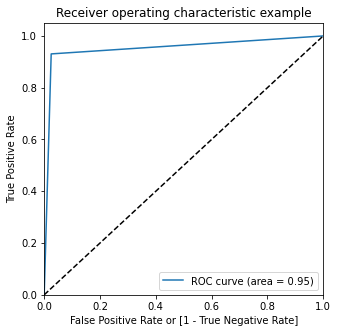

In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_ros, y_pred)

## Hyper Parameters tuning using Randomized Search

In [100]:
lm2 = LogisticRegression()

In [101]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution

C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [102]:
# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(lm2, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [103]:
# Fit randomized search
best_model = clf.fit(X_ros, y_ros)

In [104]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.07952053535918235


In [105]:
# Predict target vector
y_pred2 = best_model.predict(X_ros)

In [106]:
#Accuracy
best_model.score(X_ros,y_ros)

0.9528489599035272

In [107]:
confusion = metrics.confusion_matrix(y_ros,y_pred2)
print(confusion)

[[194063   4957]
 [ 13811 185209]]


In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.9306049643251935
specificity:  0.9750929554818611


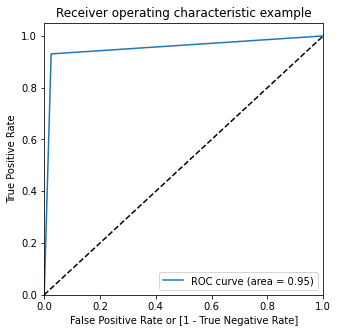

In [109]:
# ROC Curve
draw_roc(y_ros, y_pred2)

 As we can see that ROC Curve area is 0.85

# <a> Logistic Regression With SMOTE </a>

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smote = SMOTE(random_state = 100)
X_smote , y_smote = smote.fit_resample(X_train,y_train)

In [112]:
#Logistic Regression
logreg2 = LogisticRegression()
logreg2.fit(X_smote,y_smote)

y_pred = logreg2.predict(X_smote)


In [113]:
logreg2.score(X_smote,y_smote)

0.9496934981408903

So accuracy comes out to be 94.96% which is quite good 

In [114]:
logreg2.coef_

array([[ 3.85375223e-01, -1.28626418e-01, -1.20154654e-01,
         1.89919595e+00,  3.13230031e-01, -4.94079119e-02,
         6.48652070e-05, -8.36800390e-01, -3.24334906e-01,
        -1.44738998e+00,  9.25822000e-01, -1.15701974e+00,
        -1.20843549e-01, -1.48038193e+00, -7.88844028e-02,
        -7.34851921e-01, -8.16535234e-01, -2.53818144e-01,
         6.56307774e-02,  3.70401734e-02,  1.23346861e-01,
         2.04217271e-01, -1.64449170e-01,  1.49462967e-01,
        -1.94265024e-01, -6.78379344e-03,  1.17539409e-01,
         1.44361391e-01,  1.45615379e-01]])

### Confusion Matrix  

In [115]:
confusion = metrics.confusion_matrix(y_smote,y_pred)
print(confusion)

[[193619   5401]
 [ 14623 184397]]


In [116]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [117]:
print(" Sensitivity : ", TP / float(TP+FN))
print(" Specificity : ", TN / float(FP+TN))
print(" False Positive Rate : ", FP / float(TN+FP)) 
print(" False Negative Rate : ", FP / float(TN+FP)) 
print(" Positive Predictive Value : ", TP / float(TP+FP)) 
print(" Negative Predictive Value : ", TN / float(TN+FN))

 Sensitivity :  0.9265249723645864
 Specificity :  0.9728620239171942
 False Positive Rate :  0.02713797608280575
 False Negative Rate :  0.02713797608280575
 Positive Predictive Value :  0.9715434303838818
 Negative Predictive Value :  0.9297788150325103


## Observations
1. Accuracy is 95.27% which is quite high and there are chances of model overfitting .
2. Sensivity is 93.03%.It means model is good in predicting the positives(i.e. Model is good in predicting the frauds).
3. Specificity is 97.50%. It shows that model prediction for non-fraud transaction is extremely good.
4. False positive and false negative rates are quite low.

## ROC Curve - Logistic Regression with SMOTE 

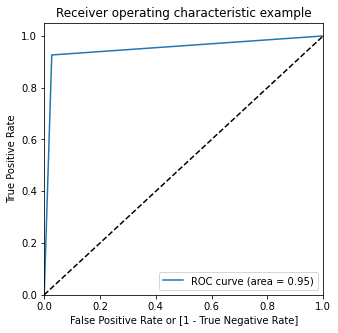

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_smote, y_pred)

## Hyper Parameters tuning using Randomized Search

In [119]:
lm2 = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution

C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [120]:
# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(lm2, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [121]:
# Fit randomized search
best_model = clf.fit(X_smote, y_smote)

In [122]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.07952053535918235


In [123]:
# Predict target vector
y_pred2 = best_model.predict(X_smote)

In [124]:
#Accuracy
best_model.score(X_smote,y_smote)

0.9497186212440961

In [125]:
confusion = metrics.confusion_matrix(y_smote,y_pred2)
print(confusion)

[[193644   5376]
 [ 14638 184382]]


In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.9264496030549694
specificity:  0.9729876394332228


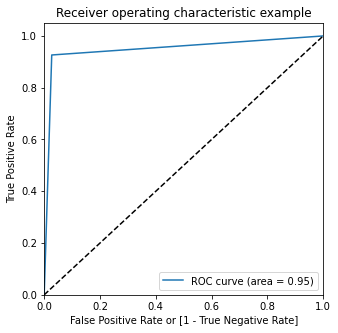

In [127]:
# ROC Curve
draw_roc(y_smote, y_pred2)

# <a> Logistic Regression With ADASYN </a>

In [45]:
from imblearn.over_sampling import ADASYN

In [46]:
adasyn = ADASYN(random_state = 100)
X_ada ,y_ada = adasyn.fit_resample(X_train,y_train)

In [130]:
#Logistic Regression
logreg_ad = LogisticRegression()
logreg_ad.fit(X_ada,y_ada)

y_pred = logreg_ad.predict(X_ada)

In [131]:
logreg_ad.score(X_ada,y_ada)

0.8949112681753882

In [132]:
logreg_ad.coef_

array([[ 0.45364334, -0.41019419, -0.11968896,  2.14957979,  0.22847887,
         0.00498857,  0.06186684, -1.04837342, -0.4854249 , -1.87952304,
         1.11717296, -1.37242625,  0.00331993, -1.84723602, -0.14292256,
        -1.02154644, -1.04246842, -0.2484973 ,  0.16629837, -0.02895847,
         0.08673685,  0.3439057 , -0.32005529,  0.15293849, -0.23070569,
         0.02868372,  0.19007524,  0.22853792, -0.06499906]])

## Confusion Matrix

In [133]:
confusion = metrics.confusion_matrix(y_ada,y_pred)
print(confusion)

[[180930  18090]
 [ 23735 175242]]


In [134]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
print(" Sensitivity : ", TP / float(TP+FN))
print(" Specificity : ", TN / float(FP+TN))
print(" False Positive Rate : ", FP / float(TN+FP)) 
print(" False Negative Rate : ", FP / float(TN+FP)) 
print(" Positive Predictive Value : ", TP / float(TP+FP)) 
print(" Negative Predictive Value : ", TN / float(TN+FN))

 Sensitivity :  0.8807148564909513
 Specificity :  0.9091046126017486
 False Positive Rate :  0.09089538739825143
 False Negative Rate :  0.09089538739825143
 Positive Predictive Value :  0.9064303891750978
 Negative Predictive Value :  0.8840300002443017


### Logistic Regression with ADASYN ROC Curve

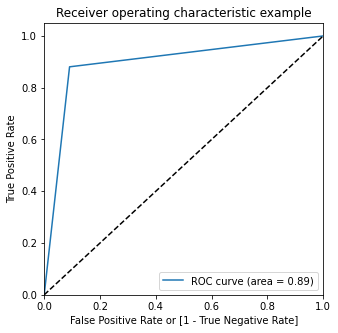

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_ada, y_pred)

In [137]:
## Hyper Parameters tuning using Randomized Search

In [138]:
lm3 = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution

C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [139]:
# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(lm3, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [140]:
# Fit randomized search
best_model = clf.fit(X_ada, y_ada)

In [141]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.7450408455106836


In [142]:
# Predict target vector
y_pred= best_model.predict(X_ada)


#Accuracy
best_model.score(X_ada,y_ada)

0.8949137807571413

In [143]:
confusion = metrics.confusion_matrix(y_ada,y_pred)
print(confusion)

[[180931  18089]
 [ 23735 175242]]


In [144]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.8807148564909513
specificity:  0.9091096372223897


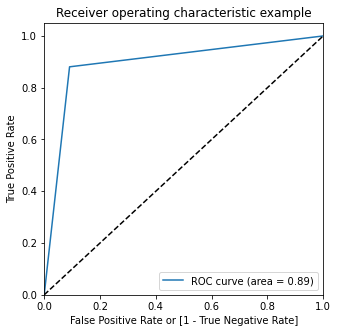

In [145]:
# ROC Curve
draw_roc(y_ada, y_pred)

# <a> Decision Tree with Smote</a> 

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
smote  =SMOTE(random_state = 100)
X_smote , y_smote = smote.fit_resample(X_train,y_train) 

In [185]:
# Create Decision Tree classifer object
dt_smote = DecisionTreeClassifier(random_state= 100)

In [186]:
# Train Decision Tree Classifer
dt_smote = dt_smote.fit(X_smote,y_smote)

In [187]:
#prediction on train set
y_pred_dt_smote  =  dt_smote.predict(X_smote)

In [188]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_smote, y_pred_dt_smote))

Accuracy: 1.0


In [189]:
conf_dt_smote = metrics.confusion_matrix(y_smote,y_pred_dt_smote)
TP = conf_dt_smote[1,1] # true positive 
TN = conf_dt_smote[0,0] # true negatives
FP = conf_dt_smote[0,1] # false positives
FN = conf_dt_smote[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  1.0
specificity:  1.0


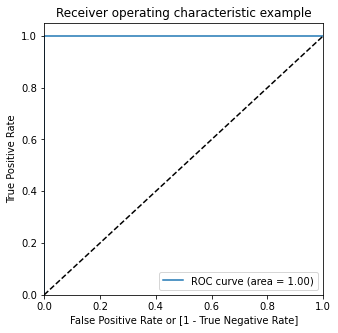

In [73]:
# ROC
draw_roc(y_smote,y_pred_dt_smote)

Decision tree is giving us the 100% accuracy and ROC curve Area is also 1 on train data set. 

#### Hyperparameter tunning for Decision Tree:
Let's tune the the hyper parameters using Randomized Search CV and find the best performing Decsion tree model :

In [74]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4,5,6,7],'min_samples_leaf'
          
          : [1, 2, 4,6,8,10],'max_depth': [10, 20, 30, 40,50,60,70],'criterion' : ['gini', 'entropy']}
dt_rscv = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)
dt_rscv.fit(X_smote, y_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 11.2min finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, 31, ...],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6,
                                                              7]},
                

In [75]:
y_pred_dt_smote2 = dt_rscv.predict(X_smote)

In [76]:
print('Accuracy :',metrics.accuracy_score(y_smote,y_pred_dt_smote2))

Accuracy : 0.9874434730177871


In [77]:
print('Accuracy :',metrics.accuracy_score(y_smote,y_pred_dt_smote2))

Accuracy : 0.9874434730177871


In [78]:
print('Accuracy :',metrics.accuracy_score(y_smote,y_pred_dt_smote2))

Accuracy : 0.9874434730177871


In [79]:
print('Accuracy :',metrics.accuracy_score(y_smote,y_pred_dt_smote2))

Accuracy : 0.9874434730177871


In [80]:
dt_rscv.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 94,
 'max_depth': 50,
 'criterion': 'entropy'}

In [81]:
dt_rscv.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 94,
 'max_depth': 50,
 'criterion': 'entropy'}

In [59]:
dt_smote_best = DecisionTreeClassifier(min_samples_split= 2,min_samples_leaf= 2, max_leaf_nodes=94,max_depth=50,criterion="entropy" )
dt_smote_best = dt_smote_best.fit(X_smote, y_smote)

In [67]:
y_pred_dt_smote_para = dt_ada_best.predict(X_smote)

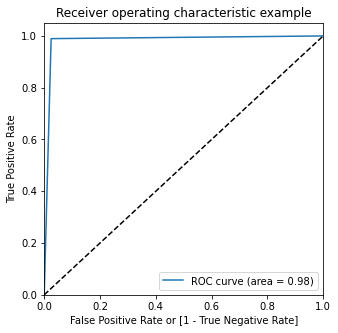

In [68]:
# ROC Decision SMOTE with Parameter Tuning
draw_roc(y_smote,y_pred_dt_smote_para)

# <a> Decision Tree with ADASYN</a> 

In [190]:
adasyn  =ADASYN(random_state = 100)
X_ada , y_ada = adasyn.fit_resample(X_train,y_train) 

In [191]:
# Create Decision Tree classifer object
dt_ada = DecisionTreeClassifier(random_state= 100)

In [192]:
# Train Decision Tree Classifer
dt_ada= dt_ada.fit(X_ada,y_ada)

In [197]:
#prediction on train set
y_pred_dt_ada =  dt_ada.predict(X_ada)

In [198]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_ada, y_pred_dt_ada))

Accuracy: 1.0


In [199]:
conf_dt_ada = metrics.confusion_matrix(y_ada,y_pred_dt_ada)
TP = conf_dt_ada[1,1] # true positive 
TN = conf_dt_ada[0,0] # true negatives
FP = conf_dt_ada[0,1] # false positives
FN = conf_dt_ada[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  1.0
specificity:  1.0


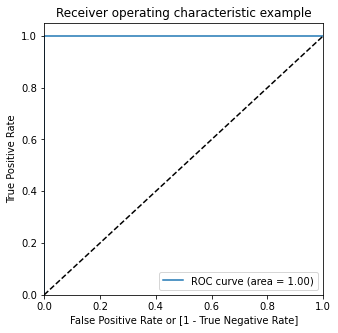

In [200]:
# ROC
draw_roc(y_ada,y_pred_dt_ada)

In [125]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4,5,6,7],'min_samples_leaf'
          
          : [1, 2, 4,6,8,10],'max_depth': [10, 20, 30, 40,50,60,70],'criterion' : ['gini', 'entropy']}
dt_rscv = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)
dt_rscv.fit(X_ada, y_ada)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.4min finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, 31, ...],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6,
                                                              7]},
                

In [126]:
y_pred_dt_ada2 = dt_rscv.predict(X_ada)

In [127]:
print('Accuracy :',metrics.accuracy_score(y_ada,y_pred_dt_ada2))

Accuracy : 0.9815099108787252


In [128]:
print('Accuracy :',metrics.accuracy_score(y_ada,y_pred_dt_ada2))

Accuracy : 0.9815099108787252


In [129]:
print('Accuracy :',metrics.accuracy_score(y_ada,y_pred_dt_ada2))

Accuracy : 0.9815099108787252


In [130]:
print('Accuracy :',metrics.accuracy_score(y_ada,y_pred_dt_ada2))

Accuracy : 0.9815099108787252


In [131]:
dt_rscv.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 95,
 'max_depth': 30,
 'criterion': 'gini'}

In [132]:
dt_rscv.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 95,
 'max_depth': 30,
 'criterion': 'gini'}

In [50]:
dt_ada_best = DecisionTreeClassifier(min_samples_split= 2,min_samples_leaf= 2, max_leaf_nodes=94,max_depth=50,criterion="entropy" )
dt_ada_best = dt_ada_best.fit(X_ada, y_ada)

In [65]:
y_pred_dt_ada_para = dt_ada_best.predict(X_ada)

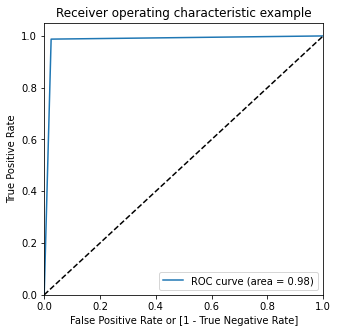

In [66]:
# ROC
draw_roc(y_ada,y_pred_dt_ada_para)

# K- Nearest Neighbours Algorithm   with SMOTE

In [133]:
smote = SMOTE(random_state = 100)
X_smote ,y_smote = smote.fit_resample(X_train,y_train)

In [134]:
 from sklearn.neighbors import KNeighborsClassifier

In [135]:
k_range = range(1,6)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_smote,y_smote)
  y_pred_knn = knn.predict(X_smote)
  scores[k] = metrics.accuracy_score(y_smote,y_pred_knn)
  scores_list.append(metrics.accuracy_score(y_smote,y_pred_knn))

Text(0, 0.5, 'Accuracy')

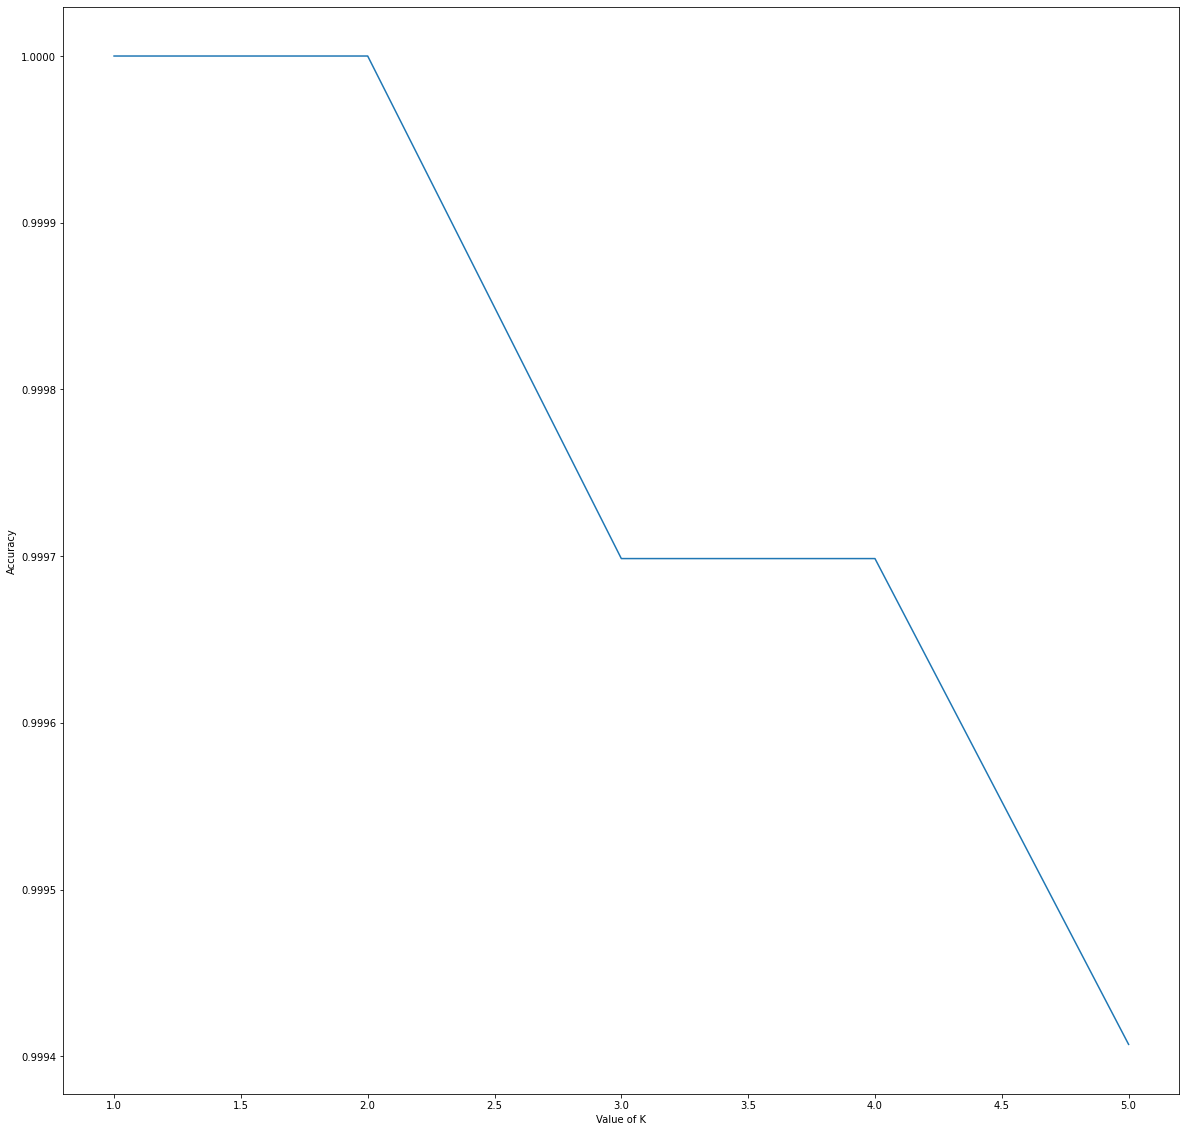

In [136]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

In [137]:
k_range = range(10,15)
scores3 = {}
scores_list3 = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_smote,y_smote)
  y_pred_knn = knn.predict(X_smote)
  scores[k] = metrics.accuracy_score(y_smote,y_pred_knn)
  scores_list.append(metrics.accuracy_score(y_smote,y_pred_knn))

In [139]:
score = metrics.accuracy_score(y_smote,y_pred_knn)
#scores_list.append(metrics.accuracy_score(y_train,y_pred_knn))

In [140]:
score

0.9983544367400261

# K- Nearest Neighbours Algorithm   with ADASYN

In [ ]:
adasyn = ADASYN(random_state = 100)
X_ada , y_ada = ADASYN.fit_resample(X_train,y_train)

In [ ]:
k_range = range(1,6)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_ada,y_ada)
  y_pred_knn = knn.predict(X_ada)
  scores[k] = metrics.accuracy_score(y_ada,y_pred_knn)
  scores_list.append(metrics.accuracy_score(y_ada,y_pred_knn))

In [ ]:
# Plot the k versus accuracy score
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.plot(k_range,scores_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

In [ ]:
k_range = range(10,15)
scores3 = {}
scores_list3 = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_ada,y_ada)
  y_pred_knn = knn.predict(X_ada)
  scores[k] = metrics.accuracy_score(y_ada,y_pred_knn)
  scores_list.append(metrics.accuracy_score(y_ada,y_pred_knn))

In [ ]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

In [ ]:
k=2
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_ada,y_ada)
y_pred_knn = knn.predict(X_ada)

In [ ]:
score = metrics.accuracy_score(y_ada,y_pred_knn)
#scores_list.append(metrics.accuracy_score(y_train,y_pred_knn))
score

# SVM with SMOTE  

In [141]:
# model
svm1 = svm.SVC(kernel='rbf')

# fit
svm1.fit(X_smote, y_smote)

# predict
y_pred_svm_smote = svm1.predict(X_smote)

In [143]:
y_pred_svm_smote

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [144]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_smote, y_pred=y_pred_svm_smote), "\n")

accuracy: 0.9903049944729173 



In [145]:
cfm_svm1 = metrics.confusion_matrix(y_true = y_smote, y_pred=y_pred_svm_smote)

In [146]:
TP = cfm_svm1[1,1] # true positive 
TN = cfm_svm1[0,0] # true negatives
FP = cfm_svm1[0,1] # false positives
FN = cfm_svm1[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.9902271128529796
specificity:  0.990382876092855


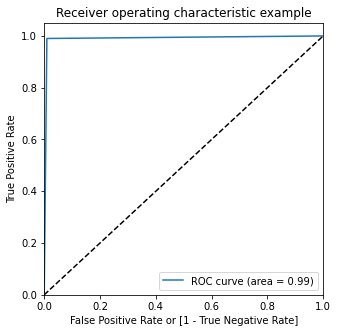

In [148]:
# ROC Curve
draw_roc(y_smote, y_pred_svm_smote)

#### Hyperparameter tunning for SVM 

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = svm.SVC(kernel="rbf")

# set up GridSearchCV()
#model_cv = RandomizedSearchCV(estimator = model, 
 #                       param_grid = hyper_params, 
  #                      scoring= 'accuracy', 
   #                     cv = folds, 
    #                    verbose = 1,
     #              return_train_score=True)  
model_rcv = RandomizedSearchCV(model, hyper_params, scoring= 'accuracy', cv=folds, verbose=1,return_train_score=True)

# fit the model
model_rcv.fit(X_smote, y_smote)        

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
y_pred_svm2 = model_rcv.predict(X_smote)

In [ ]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_smote, y_pred=y_pred_svm2))

In [ ]:
cfm_svm2 = metrics.confusion_matrix(y_true=y_smote, y_pred=y_pred_svm2)

In [ ]:
cfm_svm2

In [ ]:
TP = cfm_svm2[1,1] # true positive 
TN = cfm_svm2[0,0] # true negatives
FP = cfm_svm2[0,1] # false positives
FN = cfm_svm2[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

In [ ]:
# ROC Curve
draw_roc(y_smote, y_pred_svm2)

In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score_svm = model_rcv.best_score_
best_hyperparams_svm = model_rcv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score_svm, best_hyperparams_svm))

Building final SVM model using hyper parameters  

In [ ]:

# model
model_svm3 = svm.SVC(C=10, gamma=0.01, kernel="rbf")

model_svm3.fit(X_smote , y_smote)

In [ ]:
y_pred_svm3 = model_svm3.predict(X_smote)

In [ ]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_smote, y_pred=y_pred_svm3))

In [ ]:
cfm_svm3 = metrics.confusion_matrix(y_true=y_smote, y_pred=y_pred_svm3)
TP = cfm_svm3[1,1] # true positive 
TN = cfm_svm3[0,0] # true negatives
FP = cfm_svm3[0,1] # false positives
FN = cfm_svm3[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

In [ ]:
# ROC Curve
draw_roc(y_smote, y_pred_svm3)

# SVM with ADASYN 

In [ ]:
adasyn = ADASYN(random_state = 42)
X_ada ,y_ada = adasyn.fit_resample(X_train,y_train)

In [ ]:
# model
svm1 = svm.SVC(kernel='rbf')

# fit
svm1.fit(X_ada, y_ada)

# predict
y_pred_svm_ada = svm1.predict(X_ada)

In [ ]:
y_pred_ada

In [ ]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_ada, y_pred=y_pred_svm_ada), "\n")

In [ ]:
cfm_ada1 = metrics.confusion_matrix(y_true = y_ada, y_pred=y_pred_svm_ada)

In [ ]:
TP = cfm_ada1[1,1] # true positive 
TN = cfm_ada1[0,0] # true negatives
FP = cfm_ada1[0,1] # false positives
FN = cfm_ada1[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

In [ ]:
# ROC Curve
draw_roc(y_ada, y_pred_ada1)

### Hyperparameter tunning for ADA

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = svm.SVC(kernel="rbf")

# set up GridSearchCV()
#model_cv = RandomizedSearchCV(estimator = model, 
 #                       param_grid = hyper_params, 
  #                      scoring= 'accuracy', 
   #                     cv = folds, 
    #                    verbose = 1,
     #              return_train_score=True)  
model_rcv = RandomizedSearchCV(model, hyper_params, scoring= 'accuracy', cv=folds, verbose=1,return_train_score=True)

# fit the model
model_rcv.fit(X_ada, y_ada)        

In [ ]:
y_pred_ada2 = model_rcv.predict(X_ada)

In [ ]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_ada, y_pred=y_pred_ada2))

In [ ]:
cfm_svm2 = metrics.confusion_matrix(y_true=y_ada, y_pred=y_pred_ada2)

In [ ]:
cfm_svm2

In [ ]:
TP = cfm_svm2[1,1] # true positive 
TN = cfm_svm2[0,0] # true negatives
FP = cfm_svm2[0,1] # false positives
FN = cfm_svm2[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

In [ ]:
# ROC Curve
draw_roc(y_ada, y_pred_ada2)

In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score_svm = model_rcv.best_score_
best_hyperparams_svm = model_rcv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score_svm, best_hyperparams_svm))

 Building final SVM model using hyper parameters  

In [ ]:

# model
model_svm3 = svm.SVC(C=10, gamma=0.01, kernel="rbf")

model_svm3.fit(X_ada , y_ada)

In [ ]:
y_pred_svm3 = model_svm3.predict(X_ada)

In [ ]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_ada, y_pred=y_pred_svm3))

In [ ]:
cfm_svm3 = metrics.confusion_matrix(y_true=y_ada, y_pred=y_pred_ada3)
TP = cfm_svm3[1,1] # true positive 
TN = cfm_svm3[0,0] # true negatives
FP = cfm_svm3[0,1] # false positives
FN = cfm_svm3[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

In [ ]:
# ROC Curve
draw_roc(y_ada, y_pred_ada3)

# Random Foresst With ADASYN 

In [47]:
adasyn = ADASYN(random_state = 100)
x_ada,y_ada = adasyn.fit_resample(X_train,y_train)

In [ ]:
# Number of trees in random forrest 
n_estimators = [int(x) for x in np.linspace(start = 200 , stop = 2000 , num = 10)]

In [ ]:
# Number of features at every split
max_features = ['auto','sqrt']

In [ ]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110 , num = 11)]
max_depth.append(None)

In [ ]:
min_samples_split = [2,5,10]

In [ ]:
min_samples_leaf = [1,2,4]

In [ ]:
bootstrap = [True,False]

In [ ]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}

In [ ]:
print(random_grid)

In [ ]:
rfc2 = RandomForestClassifier()
rscv_rf = RandomizedSearchCV(estimator = rfc2,param_distributions = random_grid,n_iter = 10, cv =3,verbose = 2, random_state =42, n_iter = 10)

In [ ]:
rscv_rf.fit(X_ada,y_ada)

# Model Evaluation 

In [52]:
#balancing the x_test & y_test using smote
smote = SMOTE(random_state= 100)
X_smote_test , y_smote_test = smote.fit_resample(X_test,y_test)

In [53]:
#balancing the x_test & y_test using adasyn 
adasyn = ADASYN(random_state = 100)
X_ada_test , y_ada_test = adasyn.fit_resample(X_test,y_test)

# 1.Logistic regression with smote 

In [161]:
#prediction on the test set
y_pred_smote = logreg.predict(X_smote_test)

In [165]:
logreg.score(X_smote_test,y_smote_test)

0.8568028606600622

In [168]:
#confusion matrix
confusion = metrics.confusion_matrix(y_ros_test,y_pred_ros)
print(confusion)

[[63732 21563]
 [ 4122 81173]]


In [169]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [170]:
print(" Sensitivity : ", TP / float(TP+FN))
print(" Specificity : ", TN / float(FP+TN))
print(" False Positive Rate : ", FP / float(TN+FP)) 
print(" False Negative Rate : ", FP / float(TN+FP)) 
print(" Positive Predictive Value : ", TP / float(TP+FP)) 
print(" Negative Predictive Value : ", TN / float(TN+FN))

 Sensitivity :  0.9516736033765167
 Specificity :  0.7471950290169412
 False Positive Rate :  0.2528049709830588
 False Negative Rate :  0.2528049709830588
 Positive Predictive Value :  0.7901125214141099
 Negative Predictive Value :  0.9392519232469715


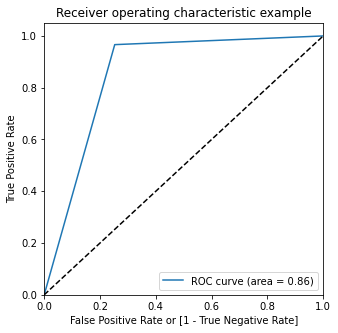

In [171]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_smote_test, y_pred_smote)

## 2.Logistic Regression with RandomOverSampling  

In [51]:
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics

In [52]:
#applying random over sampling technique
ros = RandomOverSampler(random_state=100)
X_ros_test, y_ros_test = ros.fit_resample(X_test, y_test)

In [151]:
#prediction on test set  
y_pred_ros = logreg.predict(X_ros_test)

In [152]:
logreg.score(X_ros_test,y_ros_test)

0.849434316196729

 Confusion Matrix

In [154]:
confusion = metrics.confusion_matrix(y_ros_test,y_pred_ros)
print(confusion)

[[63732 21563]
 [ 4122 81173]]


In [155]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [156]:
print(" Sensitivity : ", TP / float(TP+FN))
print(" Specificity : ", TN / float(FP+TN))
print(" False Positive Rate : ", FP / float(TN+FP)) 
print(" False Negative Rate : ", FP / float(TN+FP)) 
print(" Positive Predictive Value : ", TP / float(TP+FP)) 
print(" Negative Predictive Value : ", TN / float(TN+FN))

 Sensitivity :  0.9516736033765167
 Specificity :  0.7471950290169412
 False Positive Rate :  0.2528049709830588
 False Negative Rate :  0.2528049709830588
 Positive Predictive Value :  0.7901125214141099
 Negative Predictive Value :  0.9392519232469715


## Logistic Regression With RandomOverSampling ROC Curve

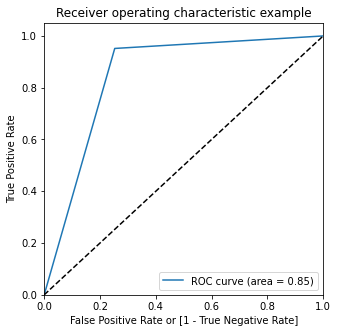

In [157]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_ros_test, y_pred_ros)

# 3. Logistic Regression with ADASYN 

In [172]:
#prediction on test set  
y_pred_ada = logreg_ad.predict(X_ada_test)

In [175]:
logreg_ad.score(X_ada_test,y_ada_test)

0.8461042387289676

In [178]:
#Confusion matrix for logistic regression with adasyn 
confusion = metrics.confusion_matrix(y_ada_test,y_pred_ada)
print(confusion)

[[79687  5608]
 [20642 64633]]


In [179]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [180]:
print(" Sensitivity : ", TP / float(TP+FN))
print(" Specificity : ", TN / float(FP+TN))
print(" False Positive Rate : ", FP / float(TN+FP)) 
print(" False Negative Rate : ", FP / float(TN+FP)) 
print(" Positive Predictive Value : ", TP / float(TP+FP)) 
print(" Negative Predictive Value : ", TN / float(TN+FN))

 Sensitivity :  0.7579360891234243
 Specificity :  0.9342517146374348
 False Positive Rate :  0.06574828536256522
 False Negative Rate :  0.06574828536256522
 Positive Predictive Value :  0.9201605899688217
 Negative Predictive Value :  0.7942568948160552


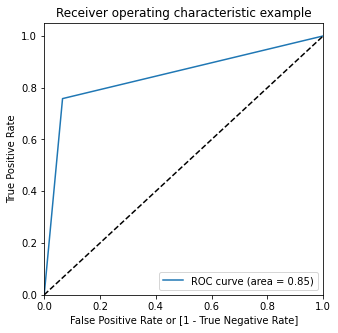

In [182]:
### Logistic Regression with ADASYN ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_ada_test, y_pred_ada)

# 4. Logistic Regression 

In [208]:
y_pred_test = lm.predict(X_test)

In [209]:
lm.score(X_test,y_test)

0.9986774808936952

In [210]:
#Confusion matrix for logistic regression with adasyn 
confusion = metrics.confusion_matrix(y_test,y_pred_test)
print(confusion)

[[85241    54]
 [   59    89]]


In [211]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print(" Sensitivity : ", TP / float(TP+FN))
print(" Specificity : ", TN / float(FP+TN))
print(" False Positive Rate : ", FP / float(TN+FP)) 
print(" False Negative Rate : ", FP / float(TN+FP)) 
print(" Positive Predictive Value : ", TP / float(TP+FP)) 
print(" Negative Predictive Value : ", TN / float(TN+FN))

 Sensitivity :  0.6013513513513513
 Specificity :  0.9993669031010024
 False Positive Rate :  0.0006330968989975966
 False Negative Rate :  0.0006330968989975966
 Positive Predictive Value :  0.6223776223776224
 Negative Predictive Value :  0.9993083235638921


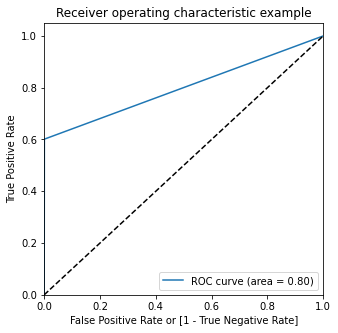

In [213]:
### Logistic Regression ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_test, y_pred_test)

# 5. Logistic Regression with hyperparameter tuning 

In [271]:
# Predict target vector
y_pred2 = best_model.predict(X_test)

In [272]:
#Accuracy
best_model.score(X_test,y_test)

0.9986774808936952

In [275]:
#confusion matrix for Logistic Regression
confusion = metrics.confusion_matrix(y_test,y_pred2)
print(confusion)

[[85241    54]
 [   59    89]]


In [276]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.6013513513513513
specificity:  0.9993669031010024


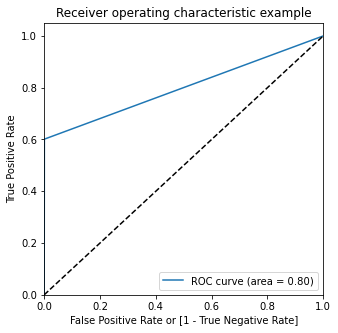

In [273]:
# ROC Curve
draw_roc(y_test, y_pred2)

#### Observations :
    We can see that Logistic regression with SMOTE has provided us the best results in terms of accuracy and other metrieces like Sensivity and specificity and AUC of ROC curve.
    Hence SMOTE is the best balancing technique Logistic regression.

# 5.Decision Tree 

In [217]:
#prediction on test set
y_pred_dt_test  =  decision_tree1.predict(X_test)

In [218]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt_test))

Accuracy: 0.9967463689243121


In [219]:
#Confusion matrix for Decision Tree with Smote

conf_dt_smote = metrics.confusion_matrix(y_test,y_pred_dt_test)
TP = conf_dt_smote[1,1] # true positive 
TN = conf_dt_smote[0,0] # true negatives
FP = conf_dt_smote[0,1] # false positives
FN = conf_dt_smote[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.527027027027027
specificity:  0.9975614045371944


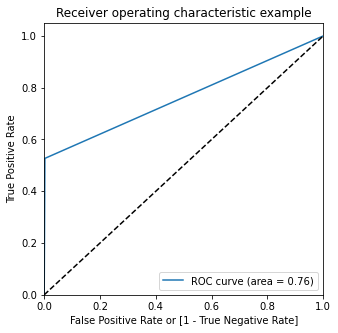

In [220]:
# ROC
draw_roc(y_test,y_pred_dt_test)

Accuracy quite high but the Sensivity very low for this model. AUC for ROC is also decent.

# 6. Decision Tree with SMOTE 

In [193]:
#prediction on test set
y_pred_dt_smote_test  =  dt_smote.predict(X_smote_test)

In [194]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_smote_test, y_pred_dt_smote_test))

Accuracy: 0.7700041034058268


In [195]:
#Confusion matrix for Decision Tree with Smote

conf_dt_smote = metrics.confusion_matrix(y_smote_test,y_pred_dt_smote_test)
TP = conf_dt_smote[1,1] # true positive 
TN = conf_dt_smote[0,0] # true negatives
FP = conf_dt_smote[0,1] # false positives
FN = conf_dt_smote[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.5427164546573656
specificity:  0.9972917521542881


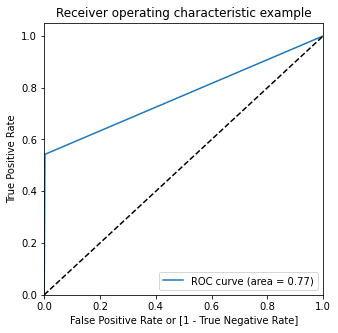

In [196]:
# ROC
draw_roc(y_smote_test,y_pred_dt_smote_test)

 # 7. Decision Tree with ADASYN 

In [203]:
#prediction on train set
y_pred_dt_ada_test =  dt_ada.predict(X_ada_test)

In [204]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_ada_test, y_pred_dt_ada_test))

Accuracy: 0.7885560180571026


In [206]:
#Cnfusion Matrix 

conf_dt_ada = metrics.confusion_matrix(y_ada_test,y_pred_dt_ada_test)
TP = conf_dt_ada[1,1] # true positive 
TN = conf_dt_ada[0,0] # true negatives
FP = conf_dt_ada[0,1] # false positives
FN = conf_dt_ada[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.5832776311931984
specificity:  0.9937862711765051


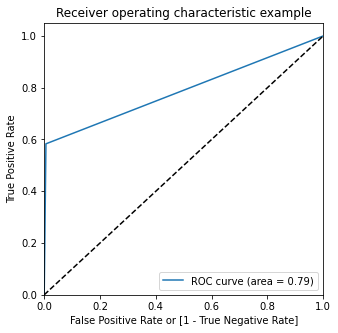

In [207]:
# ROC
draw_roc(y_ada_test,y_pred_dt_ada_test)

From all of the above, decision tree has performed better with Adasyn balancing.Although the metrices are very close for all the models however Adasyn has provided us better results.Let's test decision tree after paramter tunning also in following steps.

# 8. Decision Tree with hyperparameter tuning 

In [264]:
y_pred_dt_test_para = decision_tree3.predict(X_test)

In [266]:
print('Accuracy :',metrics.accuracy_score(y_test,y_pred_dt_test_para))

Accuracy : 0.9984199992977775


In [267]:
conf_dt2 = metrics.confusion_matrix(y_test,y_pred_dt_test_para)
TP = conf_dt2[1,1] # true positive 
TN = conf_dt2[0,0] # true negatives
FP = conf_dt2[0,1] # false positives
FN = conf_dt2[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.7297297297297297
specificity:  0.9988862184184302


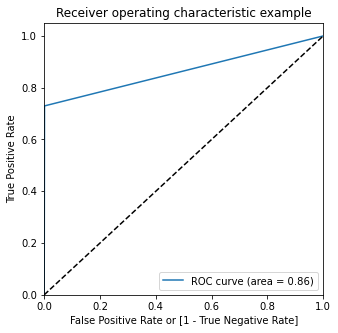

In [268]:
# ROC
draw_roc(y_test,y_pred_dt_test_para)

#### Observations:
    All the metrices including AUC for ROC curve have increased after hyper paramter tunning.Hence this is the best model for Decision tree

# 9. Decision Tree With SMOTE & hyperparameter Tuning 

In [60]:
y_pred_dt_smote_para = dt_smote_best.predict(X_smote_test)

In [61]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_smote_test, y_pred_dt_smote_para))

Accuracy: 0.9341813705375461


In [62]:
conf_dt_smote = metrics.confusion_matrix(y_smote_test,y_pred_dt_smote_para)
TP = conf_dt_smote[1,1] # true positive 
TN = conf_dt_smote[0,0] # true negatives
FP = conf_dt_smote[0,1] # false positives
FN = conf_dt_smote[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.8953983234656193
specificity:  0.972964417609473


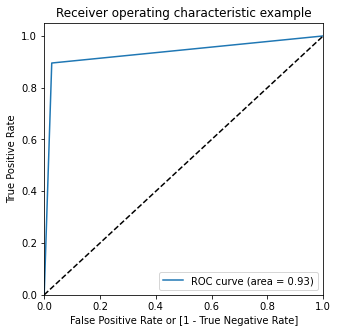

In [63]:
# ROC
draw_roc(y_smote_test,y_pred_dt_smote_para)

AUC for ROC has increased significantly on balanced data set with the same model(tunned hyperparameters).Other metrices also have increased significanlty except the accuracye which has dropped slightly but other metrices gain is over and above it.

# 10. Decision Tree With ADASYN & hyperparameter Tuning 

In [54]:
y_pred_dt_ada_para = dt_ada_best.predict(X_ada_test)

In [55]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_ada_test, y_pred_dt_ada_para))

Accuracy: 0.8910124875417718


In [56]:
conf_dt_smote = metrics.confusion_matrix(y_ada_test,y_pred_dt_ada_para)
TP = conf_dt_smote[1,1] # true positive 
TN = conf_dt_smote[0,0] # true negatives
FP = conf_dt_smote[0,1] # false positives
FN = conf_dt_smote[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.809744942832014
specificity:  0.9722609766105867


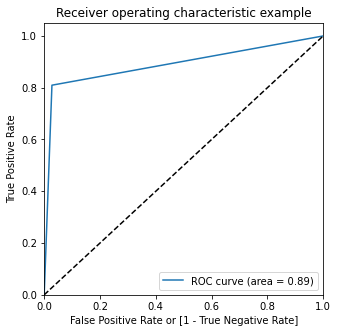

In [57]:
# ROC
draw_roc(y_ada_test,y_pred_dt_ada_para)

Model is doing pretty good on Adasyn balanced data set also. However model is performing pretty well on the data set balanced with SMOTE.

#  10. Random Forest  without hyperparameter tuning

In [280]:
y_pred_rfc_whyp = rfc1.predict(X_test)

In [281]:
print('Accuracy :',metrics.accuracy_score(y_test,y_pred_rfc_whyp))

Accuracy : 0.9993211848834895


In [282]:
conf_rfc1 = metrics.confusion_matrix(y_test,y_pred_rfc_whyp)
TP = conf_rfc1[1,1] # true positive 
TN = conf_rfc1[0,0] # true negatives
FP = conf_rfc1[0,1] # false positives
FN = conf_rfc1[1,0] # false negatives
# Sensivity
sensivity = TP / float(TP+FN)
print('Sensivity: ',sensivity)
# Specificity
specificity = TN / float(TN+FP)
print('specificity: ',specificity)

Sensivity:  0.7837837837837838
specificity:  0.9996951755671493


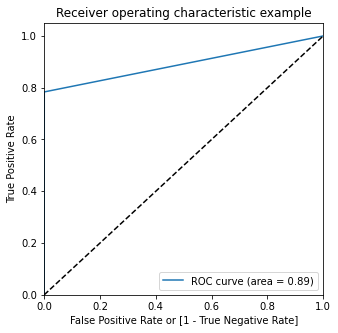

In [283]:
# ROC
draw_roc(y_test,y_pred_rfc_whyp)

### Observations :
1. From all of the above, decision tree with hyper paramter tunned model is working best on SMOTE balanced data set.
2. It is observed that hyper parameter tunning plays an important role in enhancement of the model performance.
3. Models perform well on the balanced data as compared to imbalanced ones.Models might have higer accuracy on the imbalanced data sets but when other matrices are also tkane into accoutn then balancing techniques outperform the prior ones.It shows that blancing of the data set is also important to get reliable performance of the model.
